Импортирование библиотек.

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import Ridge, Lasso

Считывание данных.

In [2]:
data = pd.read_csv('forestfires.csv')
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Обрабатываем выбросы

In [3]:
quant = data["area"].quantile(0.9)# считаем квантиль 90 %
quant

25.262000000000043

In [4]:
df_new = data[data["area"] < quant] # убираем выбросы по квантилю
df_new

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Масштабируем.

In [5]:
features_to_scale = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
min_max_scaler = MinMaxScaler()
df_new[features_to_scale] = min_max_scaler.fit_transform(df_new[features_to_scale])

C:\Users\Алексей\AppData\Local\Temp\ipykernel_14208\3784697685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[features_to_scale] = min_max_scaler.fit_transform(df_new[features_to_scale])


One-hot encoding.

In [6]:
one_hot_encoded_data = pd.get_dummies(df_new, columns=['month', 'day'], dtype=int)
one_hot_encoded_data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,0.750,0.428571,0.870968,0.086492,0.101325,0.090909,0.197368,0.423529,0.700000,0.00000,...,0,0,0,1,0,0,0,0,0,0
1,0.750,0.285714,0.927742,0.118194,0.775419,0.119430,0.519737,0.211765,0.055556,0.00000,...,0,1,0,0,0,0,0,0,1,0
2,0.750,0.285714,0.927742,0.146795,0.796294,0.119430,0.407895,0.211765,0.100000,0.00000,...,0,1,0,0,0,1,0,0,0,0
3,0.875,0.571429,0.941935,0.110958,0.081623,0.160428,0.200658,0.964706,0.400000,0.03125,...,0,0,0,1,0,0,0,0,0,0
4,0.875,0.571429,0.910968,0.172984,0.110590,0.171123,0.302632,0.988235,0.155556,0.00000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,0.875,0.571429,0.811613,0.191592,0.771315,0.033868,0.842105,0.235294,0.255556,0.00000,...,0,0,0,0,0,0,1,0,0,0
512,0.375,0.142857,0.811613,0.191592,0.771315,0.033868,0.842105,0.200000,0.255556,0.00000,...,0,0,0,0,0,0,1,0,0,0
514,0.750,0.285714,0.811613,0.191592,0.771315,0.033868,0.625000,0.647059,0.700000,0.00000,...,0,0,0,0,0,0,1,0,0,0
515,0.000,0.285714,0.976774,0.499311,0.711622,0.201426,0.769737,0.317647,0.400000,0.00000,...,0,0,0,0,0,1,0,0,0,0


Проверяем кол-во пустых значений в столбцах.

In [7]:
one_hot_encoded_data.isna().sum()

X            0
Y            0
FFMC         0
DMC          0
DC           0
ISI          0
temp         0
RH           0
wind         0
rain         0
area         0
month_apr    0
month_aug    0
month_dec    0
month_feb    0
month_jan    0
month_jul    0
month_jun    0
month_mar    0
month_may    0
month_nov    0
month_oct    0
month_sep    0
day_fri      0
day_mon      0
day_sat      0
day_sun      0
day_thu      0
day_tue      0
day_wed      0
dtype: int64

Разбиваем на train и test мно-ва.

In [8]:
x = one_hot_encoded_data.drop("area", axis = 1) 
y = one_hot_encoded_data["area"] 
y = np.log(y+1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.2) 


Обучаем линейную регрессию.

In [10]:
model = LinearRegression().fit(x_train, y_train)

In [11]:
y_pred = model.predict(x_test)

In [12]:
y_pred

array([0.85632387, 1.48041047, 0.8074417 , 0.67122743, 0.75634827,
       0.72704215, 0.78461924, 0.7460286 , 1.35800939, 1.03748712,
       0.51670522, 0.67488989, 0.402679  , 0.66930922, 0.81003341,
       0.40621893, 0.09951742, 0.74668425, 1.30435292, 0.86390078,
       0.54670949, 0.89566779, 1.09386937, 1.33439503, 0.57107002,
       0.49618611, 0.62485104, 0.79572947, 0.90247852, 0.53060185,
       0.90110152, 0.72995273, 0.58846413, 1.20582815, 0.29096416,
       0.6792198 , 1.25942057, 1.01202283, 1.02012387, 0.7707448 ,
       0.69629932, 0.68740094, 0.3929207 , 1.05906173, 0.86724883,
       0.78920283, 0.88531508, 0.94426175, 0.4933869 , 0.88692967,
       0.84632717, 0.66169168, 0.72701184, 0.91785142, 0.68327646,
       0.73391887, 0.9140272 , 0.74993167, 0.51345208, 0.49310179,
       0.78391565, 0.756294  , 1.06285914, 0.40400981, 0.6861672 ,
       0.84084579, 0.71711346, 0.93139323, 0.37055719, 0.51345208,
       0.80894148, 0.71782313, 0.83488257, 1.01819201, 0.26185

In [13]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [14]:
RMSE

1.0934980025241934

Получаем наилучшее количество признаков


In [17]:
selector = RFECV(model, cv=7)
selector.fit(x_train, y_train)
best_n_features = selector.n_features_
best_n_f.append(best_n_features)
print("Наилучшее количество признаков:", best_n_features)


Наилучшее количество признаков: 4


Проводим отбор признаков с помощью RFE

In [19]:
selector = RFE(model, n_features_to_select=5)
selector.fit(x_train, y_train)
feature_ranks = selector.ranking_
feature_names = x_train.columns


Строим график рейтингов признаков

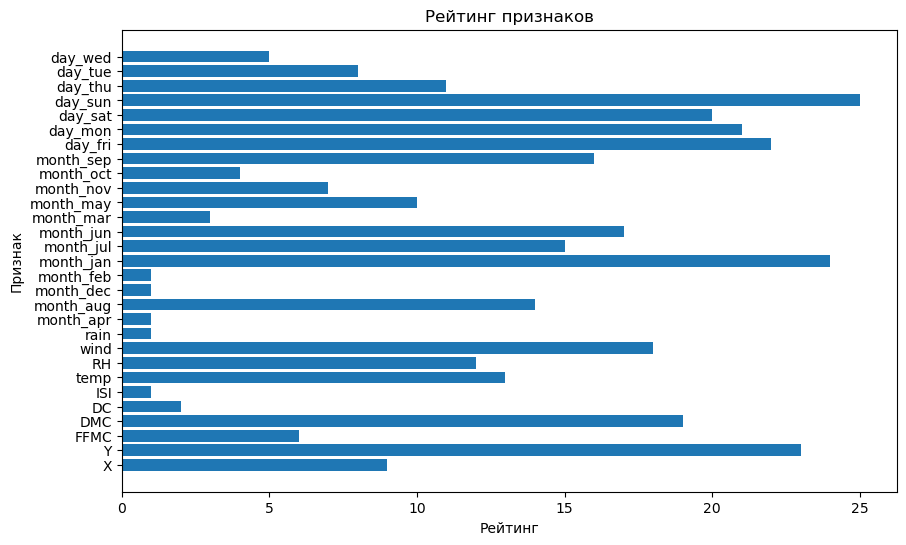

In [21]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_ranks)
plt.xlabel('Рейтинг')
plt.ylabel('Признак')
plt.title('Рейтинг признаков')
plt.show()

In [23]:
selected_features = x_train.columns[selector.support_]
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

Обучаем линейную регрессию на отобранных признаках

In [26]:
model = LinearRegression()
model.fit(x_train_selected, y_train)

mse_test = mean_squared_error(y_test, model.predict(x_test_selected))
rmse_test = np.sqrt(mse_test)
print("RMSE на тестовых данных:", rmse_test)

RMSE на тестовых данных: 1.053123499314794


Обучение Ridge регрессии.

In [29]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(x_train, y_train)
y_testR_pred=ridge_model.predict(x_test)

mse_test_ridge = mean_squared_error(y_test, y_testR_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
print("RMSE Ridge на тестовых данных:", rmse_test_ridge)

RMSE Ridge на тестовых данных: 1.093077225519493


Обучение Lasso регрессии.

In [32]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train, y_train)
y_testL_pred=lasso_model.predict(x_test)

mse_test_lasso = mean_squared_error(y_test, y_testL_pred)
rmse_test_lasso = np.sqrt(mse_test_lasso)
print("RMSE Lasso на тестовых данных:", rmse_test_lasso)

RMSE Lasso на тестовых данных: 1.0210591278315315
